In [1]:
#importing necessary librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data= pd.read_csv('BankData.csv',index_col='RowNumber')

In [3]:
df_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#Info of the data shows that all the columns is having values and there are no null values so the data need not be filled 
df_data.shape
 ''' 
#DATA HAS A SHAPE OF 10000 ROWS AND 13 COLUMNS WHICH ARE AS UNDER 
CustomerId,Surname, CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary ,
Exited    
In wich Surname , Gender , Geography are of object types 

 ''' 

IndentationError: unexpected indent (Temp/ipykernel_1340/2296254490.py, line 3)

Male      5457
Female    4543
Name: Gender, dtype: int64


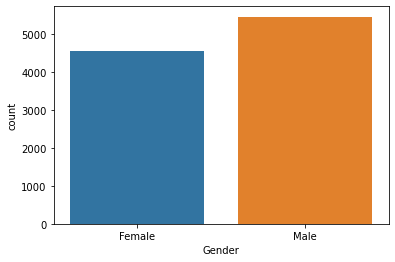

In [6]:
#Checking the value counts of object datatype to convert it into categorical data 

ax= sns.countplot(x='Gender',data=df_data)
print(df_data['Gender'].value_counts())



France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


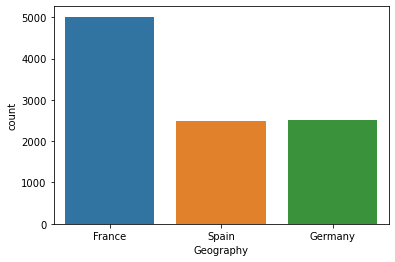

In [7]:
ax= sns.countplot(x='Geography',data=df_data)
print(df_data['Geography'].value_counts())

'\nBelow figure shows the churn rate based on the Gender - Male/Female .. \nWe came to know around out of 4543 females - 3406 females are not exited and 1137 females are exited i.e 25.02% is the \nchurn rate in females.\nand among 5457 males around 4557 males are still there not exited and around 900 left the office i.e 16.5% is the churn rate \nin males.\n\nIt Shows churn rate is greater in Females comparatively to males.\n'

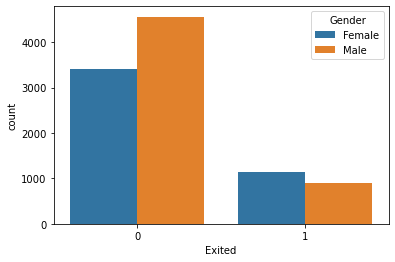

In [29]:
sns.countplot(x='Exited',data=df_data,hue='Gender')

'''
Below figure shows the churn rate based on the Gender - Male/Female .. 
We came to know around out of 4543 females - 3406 females are not exited and 1137 females are exited i.e 25.02% is the 
churn rate in females.
and among 5457 males around 4557 males are still there not exited and around 900 left the office i.e 16.5% is the churn rate 
in males.

It Shows churn rate is greater in Females comparatively to males.
'''

'\nBelow figure shows the churn rate based on the Geography - France/Spain/Germany in total.. \nWe came to know out of 5094 France candidates around 4250 candidates remained and 824 exited i.e 16.18% is the churn rate\nof France geographical area.\nWe came to know out of 2509 Germany candidates around 1684 candidates remained and 825 exited i.e 32.88% is the churn rate\nof Germany geographical area.\nWe came to know out of 2477 Spain candidates around 2000 candidates remained and 477 exited i.e 19.26% is the churn rate\nof Spain geographical area.\nChurn Rate is the Highest in Germany followed by Spain and lastly France .\n'

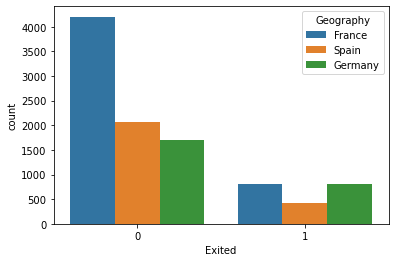

In [30]:
sns.countplot(x='Exited',data=df_data, hue='Geography')
'''
Below figure shows the churn rate based on the Geography - France/Spain/Germany in total.. 
We came to know out of 5094 France candidates around 4250 candidates remained and 824 exited i.e 16.18% is the churn rate
of France geographical area.
We came to know out of 2509 Germany candidates around 1684 candidates remained and 825 exited i.e 32.88% is the churn rate
of Germany geographical area.
We came to know out of 2477 Spain candidates around 2000 candidates remained and 477 exited i.e 19.26% is the churn rate
of Spain geographical area.
Churn Rate is the Highest in Germany followed by Spain and lastly France .
'''

0    7963
1    2037
Name: Exited, dtype: int64


'\nBelow figure shows the churn rate based on the Gender - Male/Female in total.. \nWe came to know around out of 2037 males and females exited  i.e 20.37% is the churn rate in total of the males and females.\nand 7963 still remains in the office of the total males and females i.e around 79.63% \n'

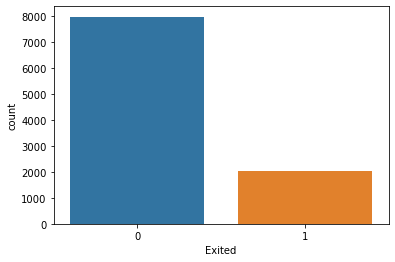

In [10]:

ax= sns.countplot(x='Exited',data=df_data)
print(df_data['Exited'].value_counts())


'''
Below figure shows the churn rate based on the Gender - Male/Female in total.. 
We came to know around out of 2037 males and females exited  i.e 20.37% is the churn rate in total of the males and females.
and 7963 still remains in the office of the total males and females i.e around 79.63% 
'''

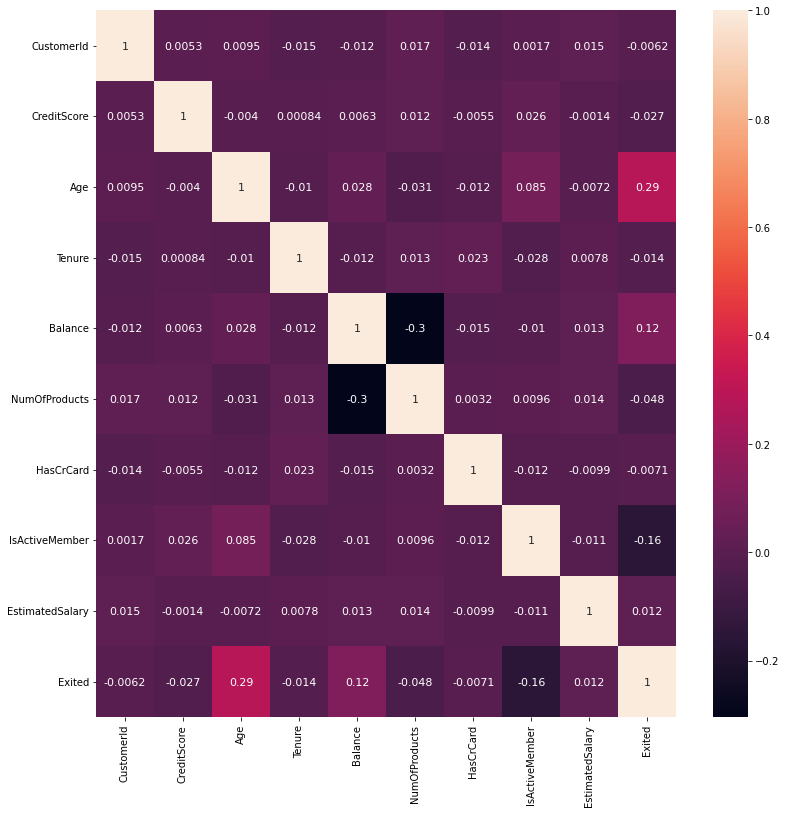

In [32]:
# Find correlation between variables using heatmap 

df_corr=df_data.corr().abs()

plt.figure(figsize=(13,13))
sns.heatmap(df_data.corr(), annot=True, annot_kws={'size':11})
plt.show()

In [34]:
#For object type data surname has no correlation and cannot effect the target data as per logic so dropping the column surname
#the data
df_data.drop(['Surname'], axis = 1, inplace = True)

In [35]:
#Replacing the values of object datatype Gender and Geographical to categorical values 

def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(df_data[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict

df_data['Gender'].replace(encode_data('Gender'),inplace = True)

df_data['Geography'].replace(encode_data('Geography'),inplace = True)


In [36]:
df_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df_data.Gender.value_counts()

# Here 1--> Male , 0 --> Female 

1    5457
0    4543
Name: Gender, dtype: int64

In [40]:
df_data.Geography.value_counts()

#Here 0 --> France , 2---> Germany , 1--> Spain

0    5014
2    2509
1    2477
Name: Geography, dtype: int64

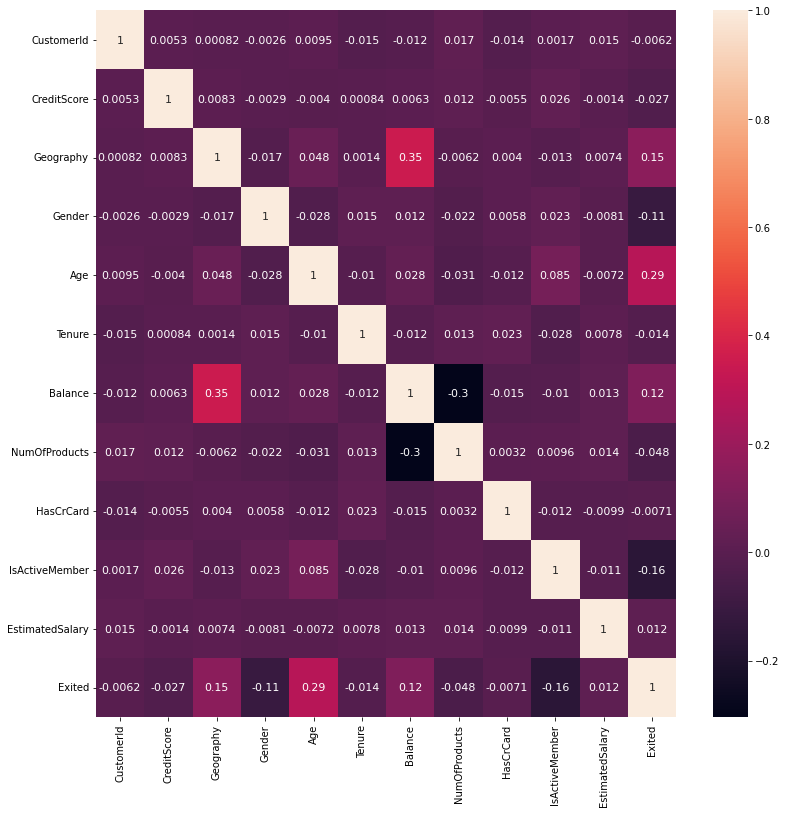

In [42]:
# Find correlation between variables using heatmap including Gender and Geography

df_corr=df_data.corr().abs()

plt.figure(figsize=(13,13))
sns.heatmap(df_data.corr(), annot=True, annot_kws={'size':11})
plt.show()

In [43]:
 ''' 

 The above heatmap shows the co-relation between the variables . NumOfProducts and IsActiveMember is showing the negative 
 relation for the churn rate (Exited) variable . Credit Score , Gender ,Tenure and Customer id is also not much related to 
 the target variable Exited 
 We can first vizualize the data and than see if we require to drop any variable 
 
 '''

' \n\nThe above heatmap shows the co-relation between the variables . NumOfProducts and IsActiveMember is showing the negative \nrelation for the churn rate (Exited) variable . Credit Score , Gender ,Tenure and Customer id is also not much related to \nthe target variable Exited \nWe can first vizualize the data and than see if we require to drop any variable \n\n'

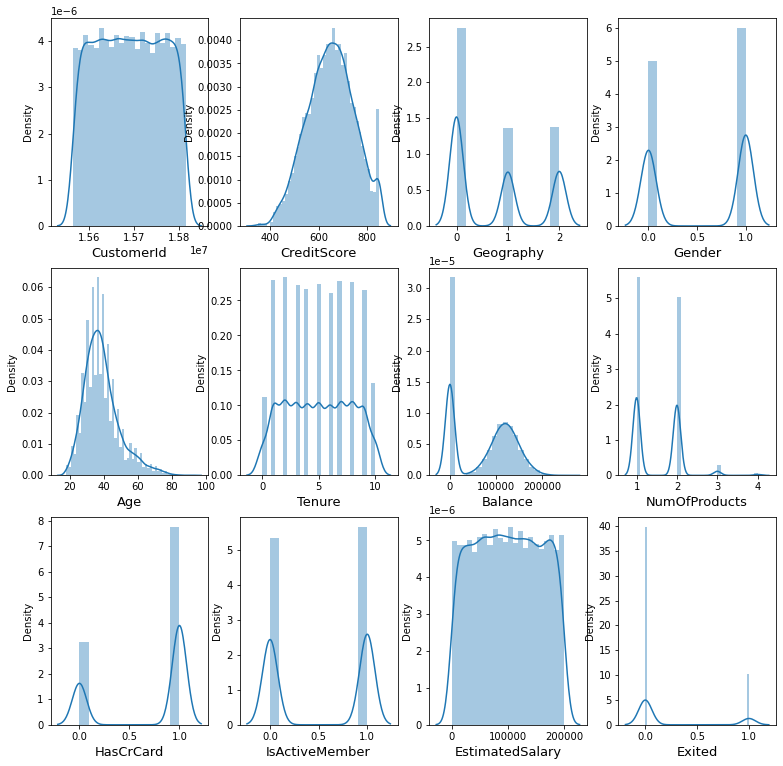

In [44]:
#DATA VISUALIZATION using Distribution Plot

x=df_data
#visualizing the data 
plt.figure(figsize=(13,13),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=13:
        ax= plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.show()

In [51]:
'''
The above visualization of data shows around normal distribution data except balance having high values for 0 . But balance can 
be 0 for the customers .So data looks good to go . So going a head with the data as it has a little skewness . 
'''

'\nThe above visualization of data shows around normal distribution data except balance having high values for 0 . But balance can \nbe 0 for the customers .So data looks good to go . So going a head with the data as it has a little skewness . \n'

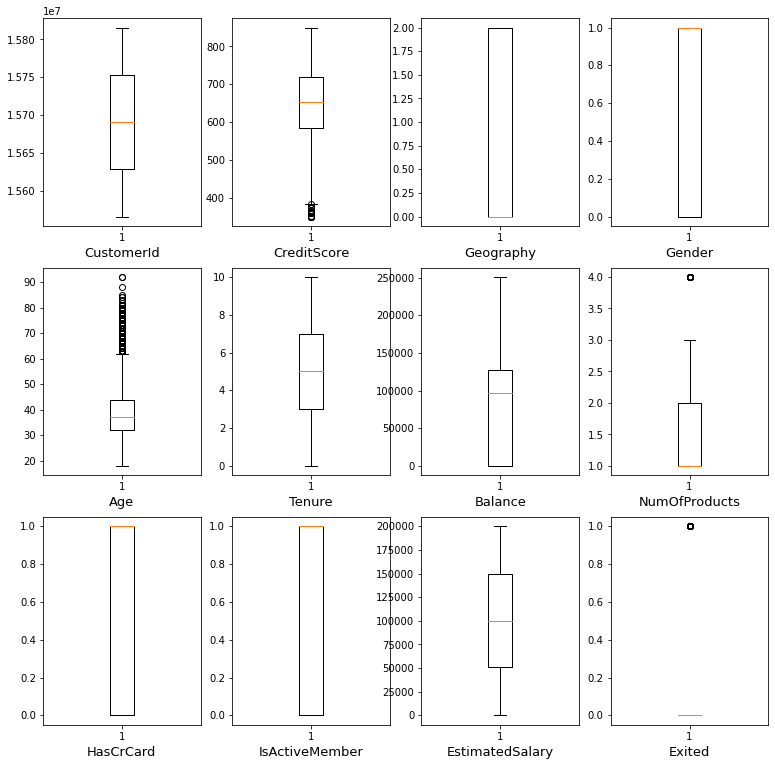

In [48]:
x=df_data
#visualizing the data using Boxplot 
plt.figure(figsize=(13,13),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=13:
        ax= plt.subplot(3,4,plotnumber)
        plt.boxplot(x[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.show()

In [52]:
'''
The above visualization of data shows boxplots for checking outliers in a better way which shows some outliers in Age and 
Credit Score .Age shows max upto 90 as most of the data lies between 30-45 years of age . But 90 is also a age which can relate
to target variable . So not removing any data . 

For credit Score showing outliers less than 400 .. Customer can have a cibil of less than 400 when is a high risk customer 
also when a customer is having cibil -1 for the fresh records , who is having no credit history which can also relate to 
the target variable .So not removing any data . 

'''

'\nThe above visualization of data shows boxplots for checking outliers in a better way which shows some outliers in Age and \nCredit Score .Age shows max upto 90 as most of the data lies between 30-45 years of age . But 90 is also a age which can relate\nto target variable . So not removing any data . \n\nFor credit Score showing outliers less than 400 .. Customer can have a cibil of less than 400 when is a high risk customer \nalso when a customer is having cibil -1 for the fresh records , who is having no credit history which can also relate to \nthe target variable .So not removing any data . \n\n'

In [73]:
#Also now taking the data and the target variable and get the prediction score 
y = df_data['Exited']
x = df_data.drop(['Exited'],axis=1)

In [74]:
#Getting accuracy score through different algorithm using firstly Logistic regression using train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 123)
scaler = StandardScaler()

In [75]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [77]:
y_pred = log_reg.predict(x_test)

In [78]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8112

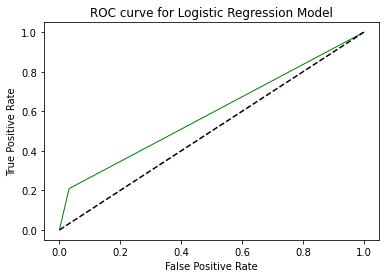

In [84]:
#ROC-aUC curve
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [85]:
#Overfitting and underfitting 

print("Train Data Score: {}".format(log_reg.score(x_train, y_train)))
print("Test Data Score: {}".format(log_reg.score(x_test, y_test)))

Train Data Score: 0.812
Test Data Score: 0.8112


In [86]:
#find out whether model performance can be improved using Cross-Validation Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.814      0.80266667 0.81666667 0.81       0.81066667]
Average cross-validation score: 0.8108000000000001


In [87]:
# Used Logistic Algo for Classification problem which gives an accuracy score as 81.12% . 
# After using cross validation also the score the accuracy does not get better . Now getting accuracy throuh Knn

The optimal number of neighbors is  13 


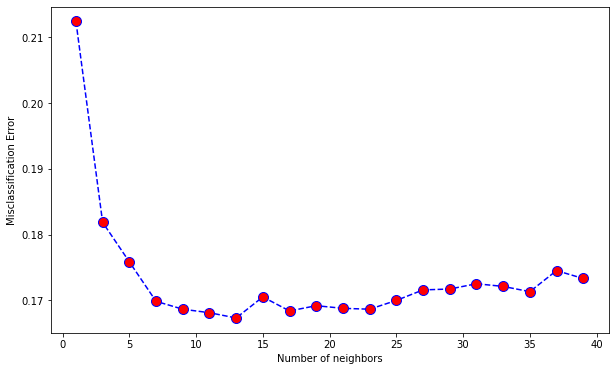

In [80]:
#getting accuracy score through knn

from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, x_train, y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


In [88]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

def print_score(clf, x_train, y_train, x_test, y_test, train = True):
	if train:
		print("Train Result:")
		print("------------")
		print("Classification Report: \n {}\n".format(classification_report(
				y_train, clf.predict(x_train))))
		print("Confusion Matrix: \n {}\n".format(confusion_matrix(
				y_train, clf.predict(x_train))))

		res = cross_val_score(clf, x_train, y_train,
							cv = 10, scoring ='accuracy')
		print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
		print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
		print("accuracy score: {0:.4f}\n".format(accuracy_score(
				y_train, clf.predict(x_train))))
		print("----------------------------------------------------------")
				
	elif train == False:
		print("Test Result:")
		print("-----------")
		print("Classification Report: \n {}\n".format(
				classification_report(y_test, clf.predict(x_test))))
		print("Confusion Matrix: \n {}\n".format(
				confusion_matrix(y_test, clf.predict(x_test))))
		print("accuracy score: {0:.4f}\n".format(
				accuracy_score(y_test, clf.predict(x_test))))
		print("-----------------------------------------------------------")
		
knn = KNeighborsClassifier(n_neighbors = 13)       #Since best optimal no of neighbors is 13 as above .
knn.fit(x_train, y_train)
print_score(knn, x_train, y_train, x_test, y_test, train = True)
print_score(knn, x_train, y_train, x_test, y_test, train = False)
 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      5980
           1       0.82      0.33      0.47      1520

    accuracy                           0.85      7500
   macro avg       0.83      0.66      0.69      7500
weighted avg       0.84      0.85      0.82      7500


Confusion Matrix: 
 [[5866  114]
 [1016  504]]

Average Accuracy: 	 0.8327
Accuracy SD: 		 0.0097
accuracy score: 0.8493

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      1983
           1       0.78      0.30      0.43       517

    accuracy                           0.84      2500
   macro avg       0.81      0.64      0.67      2500
weighted avg       0.83      0.84      0.81      2500


Confusion Matrix: 
 [[1939   44]
 [ 364  153]]

accuracy scor

In [90]:
# Using Knn model the accuracy of the model has increased upto 83.68% for test and 84.93% for train data.
# Classification report shows the different parameters like Prcision - 84%, Recall - 98%, F1 score - 90% for people not exited the bank
# and Prcision - 78%, Recall - 30%, F1 score - 43% for people exited the bank

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()


In [92]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [96]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(x_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(x_test)
print('Accuracy score is -->', accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   7.7s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   8.1s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   8.2s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  10.1s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   9.7s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   9.6s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   3.2s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

In [98]:
#Accuracy score for Randomforest is --> 86.28%